In [1]:
import pandas as pd
from time import time
import numpy as np
import os, glob

In [2]:
#compile individual df
start =time()
src = r'\\fatherserverdw\q\research\images\skin_aging\wsi\hovernet_out\df'
df = pd.concat([pd.read_pickle(_) for _ in glob.glob(os.path.join(src,'*.pkl')) if ('156' not in _) and ('167' not in _)], ignore_index=True)
print(time()-start)

191.0726237297058


In [3]:
df = df.astype({'type': 'int8',
           'inroi': 'int8',
           'resident_area': 'int32',
           'Area': 'float32',
           'Perimeter': 'float32',
           'Circularity': 'float32',
           'MA': 'float32',
           'ma': 'float32',
           'orientation': 'float32',
           'AspectRatio': 'float32',
           'Sol': 'float32',
           'Extent': 'float32',
           'EquiDia': 'float32',
           'imID': 'int16',
           'dist2nearest': 'float32',
           'oriA': 'float32',
           'oriB': 'float32',
           'local_align': 'float32'})

In [4]:
df['c2t_distance_um']=df['c2t_distance'].apply(lambda x:np.multiply(x,4))
df[['nucleus2corneum','nucleus2spinosum','nucleus2shaft','nucleus2follicle','nucleus2muscle','nucleus2oil','nucleus2sweat','nucleus2nerve','nucleus2blood','nucleus2ecm','nucleus2fat']] = pd.DataFrame(df.c2t_distance_um.tolist(), index= df.index, dtype=np.float32)
df.drop(["c2t_distance","c2t_distance_um"],inplace=True, axis=1)

In [32]:
df.to_feather(os.path.join(src, '2d_skin_hovernet_nuclei.ftr'))

In [33]:
df = pd.read_feather(os.path.join(src, '2d_skin_hovernet_nuclei.ftr'))

In [5]:
df.dtypes

bbox                 object
centroid             object
contour              object
type                   int8
inroi                  int8
resident_area         int32
Area                float32
Perimeter           float32
Circularity         float32
MA                  float32
ma                  float32
orientation         float32
AspectRatio         float32
Sol                 float32
Extent              float32
EquiDia             float32
imID                  int16
dist2nearest        float32
oriA                float32
oriB                float32
local_align         float32
nucleus2corneum     float64
nucleus2spinosum    float64
nucleus2shaft       float64
nucleus2follicle    float64
nucleus2muscle      float64
nucleus2oil         float64
nucleus2sweat       float64
nucleus2nerve       float64
nucleus2blood       float64
nucleus2ecm         float64
nucleus2fat         float64
dtype: object

In [6]:
agelut = pd.read_excel(r'\\fatherserverdw\Q\research\source code\skin_aging_matlab\skin_samples.xlsx', sheet_name='imlist')

In [66]:
df

,bbox,centroid,contour,type,inroi,resident_area,Area,Perimeter,Circularity,MA,...,nucleus2spinosum,nucleus2shaft,nucleus2follicle,nucleus2muscle,nucleus2oil,nucleus2sweat,nucleus2nerve,nucleus2blood,nucleus2ecm,nucleus2fat
0,"[[2704, 42876], [2713, 42885]]","[3968.290909090909, 41619.527272727275]","[[3966, 41616], [3965, 41617], [3965, 41618], ...",10,2,286900,43.5,25.556349,0.836954,7.145511,...,2502.0,2802.00,2770.0,1701.0,2250.0,1520.0000,1775.0,1668.0,0.0000,405.000000
1,"[[2512, 44562], [2520, 44575]]","[3607.698795180723, 43476.01204819277]","[[3605, 43472], [3604, 43473], [3603, 43473], ...",10,2,286900,67.0,33.313709,0.758645,8.322485,...,3312.0,3570.00,3626.0,2538.0,3100.0,2082.0000,2564.0,2044.0,4.0000,5.656250
2,"[[4331, 44227], [4340, 44235]]","[5318.245283018868, 43246.64150943396]","[[5318, 43243], [5317, 43244], [5316, 43244], ...",10,2,286900,41.0,25.313707,0.804048,6.713638,...,2924.0,2848.00,3390.0,2252.0,2848.0,1463.0000,1914.0,1353.0,0.0000,188.375000
3,"[[4589, 44719], [4601, 44731]]","[5812.0084745762715, 43506.338983050846]","[[5807, 43501], [5807, 43509], [5808, 43510], ...",10,2,286900,99.0,39.313709,0.804928,10.807506,...,2984.0,2598.00,3500.0,2360.0,2956.0,1430.0000,1717.0,1100.0,0.0000,203.625000
4,"[[4596, 43456], [4604, 43466]]","[4548.5, 43511.55172413793]","[[4547, 43508], [4546, 43509], [4544, 43509], ...",10,2,286900,45.0,27.313709,0.757986,6.406620,...,3148.0,3150.00,3550.0,2424.0,3012.0,1785.0000,2252.0,1629.0,0.0000,28.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7842155,"[[65636, 12348], [65650, 12358]]","[65600.92957746479, 12394.12676056338]","[[65598, 12388], [65596, 12390], [65597, 12391...",8,1,292766,55.5,35.213203,0.562460,5.088255,...,4732.0,366.25,4220.0,1135.0,3854.0,92.7500,0.0,764.0,131.0000,14.421875
7842156,"[[65642, 12287], [65656, 12297]]","[65539.975, 12399.55]","[[65536, 12394], [65535, 12395], [65535, 12396...",8,1,292766,63.5,36.384777,0.602760,6.482882,...,4728.0,352.50,4204.0,1113.0,3836.0,100.3125,4.0,744.0,103.8750,33.937500
7842157,"[[65652, 12302], [65663, 12308]]","[65552.3137254902, 12408.980392156864]","[[65550, 12404], [65550, 12411], [65551, 12412...",8,1,292766,38.0,26.485281,0.680745,5.819937,...,4732.0,350.75,4212.0,1119.0,3842.0,102.5000,0.0,749.5,108.8125,31.234375
7842158,"[[65668, 12264], [65680, 12273]]","[65516.0, 12425.90909090909]","[[65513, 12420], [65513, 12423], [65512, 12424...",8,1,292766,62.0,32.142136,0.754140,7.049459,...,4736.0,336.25,4208.0,1111.0,3838.0,116.2500,0.0,744.0,96.6875,16.968750


In [ ]:
# create celltype 12 for elongated ecm cells
df.loc[(p.AspectRatio.rdiv(1)>3) & (p.Circularity<0.5) & (p.Area>50) & (p.dist2nearest>30),'type'] = 12

In [7]:
# %%time
avgs = []
stds = []
cvs = []
#patient
for imid in df['imID'].unique():
    pkl = df[df['imID']==imid]
    pkl = pkl.drop(columns=['bbox', 'centroid','contour'])
    #section
    for secid in pkl['inroi'].unique():
        pk = pkl[pkl['inroi']==secid]
        #tissue type
        for type in range(2,13): #2-12 #12 is fibroblast
            p = pk[pk['type']==type]
            pkmean = p.mean(axis=0)
            pkmean['Ncell'] = len(p)
            # In case there is no value, prevent wiping imid, type, inroi, age
            pkmean['imID'] = imid
            pkmean['type'] = type
            pkmean['inroi'] = secid
            pkmean['Age'] = agelut['Age'][agelut['redcap']==imid].values[0]
            pkstd = p.std(axis=0)
            pkstd['Ncell'] = 0
            pkstd['imID'] = imid
            pkstd['type'] = type
            pkstd['inroi'] = secid
            pkstd['Age'] = agelut['Age'][agelut['redcap']==imid].values[0]
            pkcv = pkstd/pkmean
            pkcv['imID'] = imid
            pkcv['type'] = type
            pkcv['inroi'] = secid
            pkcv['Age'] = agelut['Age'][agelut['redcap']==8].values[0]
            stds.append(pkstd.replace(np.nan,0))
            avgs.append(pkmean.replace(np.nan, 0))
            cvs.append(pkcv.replace(np.nan, 0))

In [3]:
df2 = pd.read_pickle(r'\\fatherserverdw\q\research\images\skin_aging\wsi\hovernet_out\df\33.pkl')
pkl = df2[df2['imID']==33]
pk = pkl[pkl['inroi']==4]
pk
# p = pk[pk['type']==11]
# p

,bbox,centroid,contour,type,inroi,resident_area,c2t_distance,Area,Perimeter,Circularity,...,orientation,AspectRatio,Sol,Extent,EquiDia,imID,dist2nearest,oriA,oriB,local_align
25780,"[[25551, 28509], [25564, 28542]]","[26478.048979591837, 27604.608163265308]","[[26477, 27599], [26476, 27600], [26474, 27600...",2,4,107092,"[inf, 1.0, 406.2, inf, 124.06, inf, 20.61, 75....",211.0,76.769552,0.449898,...,78.615036,0.381016,0.855984,0.491841,16.390654,33,18.357560,96.673103,89.144226,0.102905
25781,"[[25558, 28533], [25575, 28553]]","[26494.44921875, 27613.99609375]","[[26490, 27606], [26487, 27609], [26487, 27610...",2,4,107092,"[inf, 0.0, 404.5, inf, 122.06, inf, 18.6, 75.6...",230.0,58.284271,0.850815,...,96.673103,0.888287,0.958333,0.676471,17.112717,33,15.620499,89.144226,78.615036,0.102905
25782,"[[25573, 28525], [25584, 28543]]","[26484.805369127516, 27625.68456375839]","[[26479, 27621], [26478, 27622], [26478, 27623...",2,4,107092,"[inf, 0.0, 406.0, inf, 121.0, inf, 17.69, 77.9...",127.5,47.213203,0.718775,...,89.144226,0.614717,0.947955,0.643939,12.741195,33,15.524175,99.058861,96.673103,0.054496
25783,"[[25587, 28517], [25599, 28539]]","[26480.21978021978, 27640.214285714286]","[[26475, 27635], [26474, 27636], [26473, 27636...",2,4,107092,"[inf, 0.0, 407.2, inf, 120.8, inf, 17.69, 79.2...",157.5,54.041630,0.677694,...,99.058861,0.460252,0.934718,0.596591,14.161046,33,15.524175,89.144226,113.324142,0.120935
25784,"[[25603, 28516], [25619, 28534]]","[26476.16129032258, 27658.00921658986]","[[26471, 27651], [26468, 27654], [26468, 27660...",2,4,107092,"[inf, 0.0, 407.5, inf, 119.2, inf, 16.4, 81.0,...",193.5,52.870057,0.869904,...,113.324142,0.773367,0.969925,0.671875,15.696237,33,18.439089,99.058861,103.716560,0.069039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69108,"[[34690, 30773], [34700, 30784]]","[34874.256410256414, 30598.21794871795]","[[34875, 30594], [34874, 30595], [34871, 30595...",10,4,139114,"[inf, 952.5, 688.5, inf, 272.8, inf, 243.5, 17...",63.5,31.556349,0.801328,...,64.595528,0.778917,0.933824,0.577273,8.991702,33,110.679718,48.302525,62.090263,0.150412
69109,"[[34847, 30676], [34858, 30689]]","[34778.03571428572, 30755.535714285714]","[[34779, 30751], [34778, 30752], [34777, 30752...",10,4,139114,"[inf, 950.0, 692.0, inf, 265.5, inf, 235.5, 16...",67.5,37.213203,0.612519,...,62.090263,0.589189,0.859873,0.472028,9.270581,33,126.146740,63.724079,64.595528,0.020038
69110,"[[34875, 30798], [34886, 30813]]","[34901.23, 30783.84]","[[34902, 30779], [34900, 30781], [34899, 30781...",10,4,139114,"[inf, 964.5, 704.5, inf, 279.8, inf, 249.8, 17...",83.5,38.041630,0.725067,...,63.724079,0.481215,0.938202,0.506061,10.310941,33,126.146740,62.090263,64.595528,0.020038
69111,"[[34780, 32804], [34800, 32813]]","[34855.99248120301, 32741.766917293233]","[[34856, 32732], [34856, 32733], [34855, 32734...",10,4,139114,"[inf, 983.5, 858.5, inf, 384.0, inf, 305.2, 29...",110.5,47.556349,0.613981,...,13.249051,0.372148,0.952586,0.613889,11.861407,33,147.146186,90.073563,163.000763,0.843534


<AxesSubplot:ylabel='Frequency'>

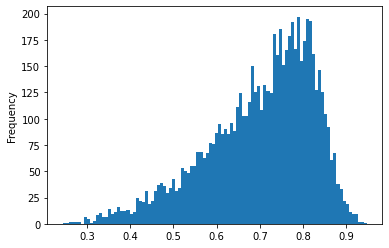

In [84]:
p.Circularity.plot.hist(by=None,bins=100)

In [96]:
len(p.loc[(p.AspectRatio.rdiv(1)>3) & (p.Circularity<0.5) & (p.Area>50) & (p.dist2nearest>30)])

218

In [87]:
p.loc[(p.AspectRatio.rdiv(1)>3) & (p.Circularity<0.5) & (p.Area>50) & (p.dist2nearest>30),'type'] = 12

In [90]:
len(p[p.type==12]),len(p[p.type==10])

(386, 6312)

In [8]:
avgdf = pd.DataFrame(avgs)
stddf = pd.DataFrame(stds)
cvdf = pd.DataFrame(cvs)

In [9]:
avgdf.to_csv('avgdf.csv')
stddf.to_csv('stddf.csv')
cvdf.to_csv('cvdf.csv')

In [19]:
from PIL import Image
Image.MAX_IMAGE_PIXELS=None
from skimage.morphology import remove_small_objects
import numpy as np
import cv2
from skimage.measure import label
from matplotlib import pyplot as plt
dlsrc = r'\\fatherserverdw\Q\research\images\skin_aging\1um\classification_v9_combined'
roisrc = r'\\fatherserverdw\Q\research\images\skin_aging\annotation\roi\tif'
dl = Image.open(os.path.join(dlsrc, '41.tif'))
roi = Image.open(os.path.join(roisrc, '41_tissue_binary.tif'))
dl.size ,roi.size

((35356, 23609), (8839, 5903))

In [36]:
roiarr = np.array(roi)
roiimL = label(roiarr)
numsec = np.max(roiimL)

#we are gonna resize dl to roi size for faster calculations
dl = dl.resize(roi.size)
dlarr = np.array(dl)

minszs = [8000,100000,1000,1000,1000,1000,1000,1000,1000,10000,1000] # 11 elements
minszs = [round(_ / 16) for _ in minszs] #downscale by 16 from 0.454um/px to 2um/px
roidx = 3
dlarrm = np.multiply(dlarr, roiimL == roidx)

minsz = minszs[roidx-1]
dltmp = dlarrm==roidx
dltmp2 = remove_small_objects(dltmp,minsz)

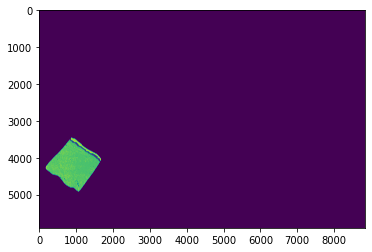

In [37]:
plt.imshow(dlarrm)

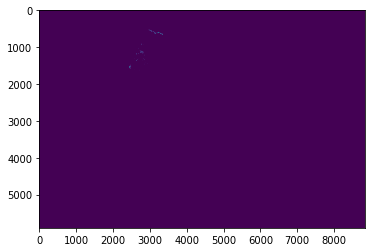

In [25]:
plt.imshow(dltmp)

In [33]:
800*16

12800

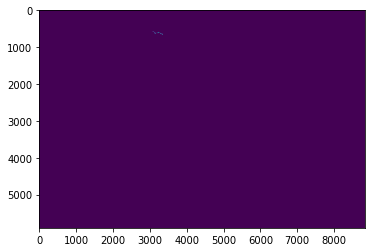

In [35]:
plt.imshow(remove_small_objects(dltmp,500))